In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
X = df.drop(columns=['BloodPressure']).values
y = df['BloodPressure'].values

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42) 

scaler.fit(X_train)
X_train

array([[  1.   ,  95.   ,  18.   , ...,   0.26 ,  22.   ,   0.   ],
       [  5.   , 105.   ,  29.   , ...,   0.159,  28.   ,   0.   ],
       [  0.   , 135.   ,  42.   , ...,   0.365,  24.   ,   1.   ],
       ...,
       [ 10.   , 101.   ,  37.   , ...,   1.136,  38.   ,   1.   ],
       [  0.   , 141.   ,   0.   , ...,   0.205,  29.   ,   1.   ],
       [  0.   , 125.   ,   0.   , ...,   0.262,  21.   ,   0.   ]])

In [6]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

print("Coefficients (Slope)", linear.coef_)
print("Bias (Intercept)", linear.intercept_)
print(f"Mean Square Error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination (r2 score): {r2_score(y_test, y_pred)}")

Coefficients (Slope) [ 0.20150404  0.06366365  0.17557679 -0.0086838   0.47097289 -1.28839301
  0.38874515 -3.07998913]
Bias (Intercept) 32.11315928051293
Mean Square Error: 401.4765313200544
Coefficient of determination (r2 score): 0.16648039688888183


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


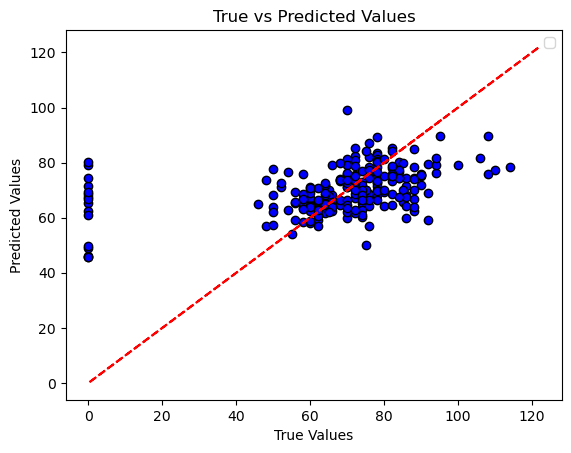

In [20]:
plt.scatter(y_test, y_pred, color="blue", edgecolors="black")
plt.plot(y_train, y_train, color="red", linestyle="--")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.legend()
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, roc_auc_score

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
X = df.drop(columns='Outcome')
y = df['Outcome']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

In [31]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled.shape

(192, 8)

In [33]:
logistic = LogisticRegression()

logistic.fit(X_train_scaled, y_train)
y_pred = logistic.predict(X_test_scaled)
y_pred.shape

(192,)

In [36]:
print(f"Accuray Score is: {accuracy_score(y_test, y_pred)}")
print(f"Precision Score is: {precision_score(y_test, y_pred)}")
print(f"Recall score is: {recall_score(y_test, y_pred)}")
print(f"ROC AUC score is: {roc_auc_score(y_test, y_pred)}")

Accuray Score is: 0.734375
Precision Score is: 0.6481481481481481
Recall score is: 0.5223880597014925
ROC AUC score is: 0.6851940298507463


In [37]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns=['TP', 'FN'], index=['FP', 'TN'])
cm_df

,TP,FN
FP,106,19
TN,32,35


<Axes: >

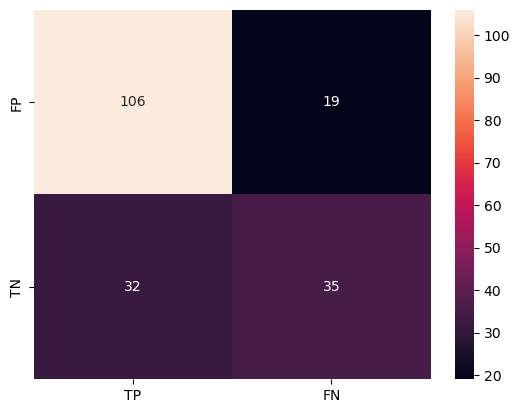

In [40]:
import seaborn as sns

sns.heatmap(cm_df, annot=True, fmt='d')

In [41]:
logistic.predict_proba(X_test_scaled)

array([[0.56502632, 0.43497368],
       [0.65719153, 0.34280847],
       [0.89755866, 0.10244134],
       [0.55294408, 0.44705592],
       [0.20051925, 0.79948075],
       [0.81659059, 0.18340941],
       [0.66023391, 0.33976609],
       [0.97764592, 0.02235408],
       [0.37217937, 0.62782063],
       [0.96061816, 0.03938184],
       [0.76854369, 0.23145631],
       [0.26929054, 0.73070946],
       [0.73637928, 0.26362072],
       [0.89480357, 0.10519643],
       [0.45730576, 0.54269424],
       [0.06564742, 0.93435258],
       [0.35506084, 0.64493916],
       [0.90082444, 0.09917556],
       [0.96904502, 0.03095498],
       [0.73530113, 0.26469887],
       [0.92105747, 0.07894253],
       [0.8380376 , 0.1619624 ],
       [0.89895329, 0.10104671],
       [0.21014156, 0.78985844],
       [0.10966305, 0.89033695],
       [0.19259157, 0.80740843],
       [0.88014742, 0.11985258],
       [0.92939152, 0.07060848],
       [0.09647016, 0.90352984],
       [0.23593745, 0.76406255],
       [0.